<a href="https://colab.research.google.com/github/Mayuri-cell/Project/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np 
from sklearn .model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

input_dataset = pd.read_csv('/content/train (2).csv')

input_dataset.shape

(891, 12)

In [31]:
input_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
input_dataset.info()
# Here total rows are 891
# Out of these rows Age , Cabin , Embarked columns have null values in some places 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
# dataset.info()  :   It gives total description
# dataset.isnull.sum() : count of missing values  

input_dataset.isnull().sum()

# Here Age column has total 177 null values , cabin has 687 and embarked has 2 null values in the data sheet 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
input_dataset = input_dataset.drop(columns='Cabin' , axis=1)

In [35]:
input_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [36]:
# To fill the values : .fillna(value_to_replaced , inplace=False)
# inplace = True : Change in original data 

In [37]:
mean_age = input_dataset['Age'].mean()
print(mean_age)

29.69911764705882


In [38]:
input_dataset['Age'].fillna(input_dataset['Age'].mean() , inplace=True) 

In [39]:
# .mode() : Gives the value which is occuring most of the times 
Max_embarked = input_dataset['Embarked'].mode()
print(Max_embarked)

0    S
dtype: object


In [40]:
input_dataset['Embarked'].fillna(input_dataset['Embarked'].mode()[0], inplace=True )

In [41]:
input_dataset.isnull().sum()

# .mode()[0] : replaces all the null values [0] must be included

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [42]:
#   .replace(       { 'column_name' : { column_values : number_indicating_it }    ,  so on....}   , inplace = true/false )
input_dataset.replace( {'Sex' : {'male' : 0 , 'female' : 1} , 'Embarked' : {'S':2 , 'C':1 ,'Q':0}} , inplace=True)

In [43]:
input_dataset['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [44]:
input_dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [45]:
import seaborn as sea

In [29]:
# Plot : counts and it's frequeencies :
# Column , data = Mention_the_dataset
# seaborn.countplot( column_name_1 , data = , hue = 'column_name_2' )    column_name_2 : main_axis 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


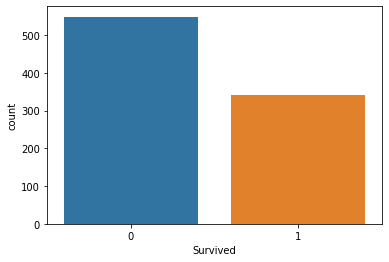

In [46]:
sea.countplot('Survived' , data=input_dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


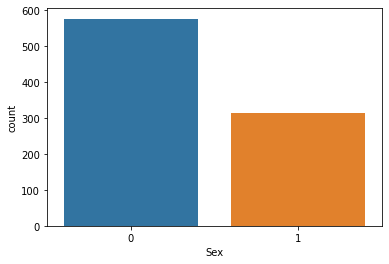

In [47]:
sea.countplot('Sex' , data=input_dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


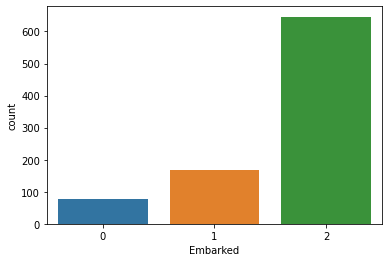

In [48]:
sea.countplot('Embarked' , data=input_dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


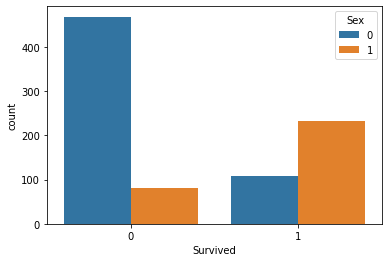

In [49]:
sea.countplot('Survived' , hue ='Sex' , data = input_dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


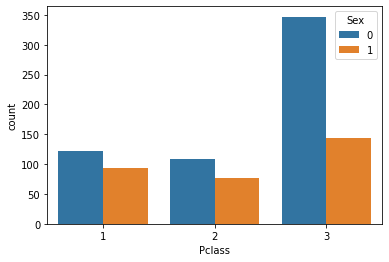

In [50]:
# Encoding of characters is favorable
# As ML models understands numbers than alphabets , chars 
sea.countplot('Pclass' , hue='Sex' , data=input_dataset)

In [51]:
X = input_dataset.drop(columns = ['PassengerId' , 'Name' , 'Ticket' , 'Survived'],axis = 1)

In [53]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         2
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         2
3         1    1  35.000000      1      0  53.1000         2
4         3    0  35.000000      0      0   8.0500         2
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         2
887       1    1  19.000000      0      0  30.0000         2
888       3    1  29.699118      1      2  23.4500         2
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         0

[891 rows x 7 columns]


In [55]:
Y = input_dataset['Survived']

In [57]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [59]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [61]:
model = LogisticRegression()


In [62]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 , random_state=2) # random compostion of X-train , X_test . Random_state must be same to have same spliting 

In [63]:
model.fit(X_train  ,  Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Accuracy


In [64]:
X_train_predict = model.predict(X_train)

In [65]:
train_sccuracy = accuracy_score(Y_train , X_train_predict)

In [66]:
X_test_predict = model.predict(X_test)

In [68]:
test_accuracy = accuracy_score(Y_test , X_test_predict)

In [70]:
print('Training data : ' , train_sccuracy)

Training data :  0.8089887640449438


In [71]:
print('Testing data : ' , test_accuracy)

Testing data :  0.7821229050279329
